# Banana Agent Navigation Project

---

### 1. Imports


In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
from dqn_agent import Agent 
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Set up the environment and agent

In [2]:
#set up the unity environment
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
# get a brain 
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
print('Number of agents:', len(env_info.agents))
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# state and action space
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

#set up an agent
agent = Agent(state_size, action_size, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train Agent with the DQN 

Run the DQN algortihm to train the agent.

Episode 100	Average Score: 0.71
Episode 200	Average Score: 4.40
Episode 300	Average Score: 8.88
Episode 400	Average Score: 10.74
Episode 489	Average Score: 13.00
Environment solved in 489 episodes!	Average Score: 13.00


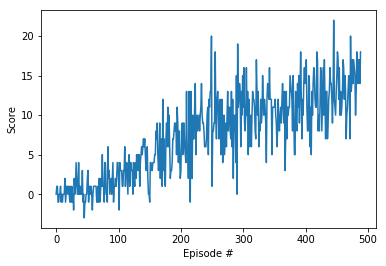

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #env.step returns brainInfo object that contains next_state, reward and done 
            brainInfo = env.step(int(action))[brain_name]           
            next_state = brainInfo.vector_observations[0]
            reward = brainInfo.rewards[0]
            #true when episode done, otherwise false
            done = brainInfo.local_done[0]
            #pass new observations from brain to agent
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_training_model_128_64.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 4. Test Agent


In [16]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_training_model_128_64.pth', map_location = 'cpu'))

#test agent for one episode
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0
for t in range(1000):
    action = agent.act(state)
    #env.step returns brainInfo Object that contains next_state, reward and done 
    brainInfo = env.step(int(action))[brain_name]
    next_state = brainInfo.vector_observations[0]
    reward = brainInfo.rewards[0]
    #true when episode done, otherwise false
    done = brainInfo.local_done[0]
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if done:
        break 
        #scores_window.append(score)       # save most recent score
        #scores.append(score)

print("Score: {}".format(score))


Score: 20.0


# 5. Close the environment

In [6]:
env.close()